In [1]:
from tdmclient import ClientAsync

from global_navigation import GlobalNavigation

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 6ca1ca45-4524-41eb-8cc4-fb023f64b9d0

In [2]:
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

In [3]:
#create vision module object
visio = Vision()
visio.begin(show_which=[1,1,1,1])

Caméra initialisée sur le port 0


Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 2 corners stored
4 detected corners, 2 corners stored
No crossing found before index 125.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 2 corners stored
4 detected corners, 2 corners stored
No crossing found before index 125.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 5]
Detected 3 markers : [3, 4, 5]
4 detected corners, 2 corners stored
4 detected corners, 2 corners stored
No crossing found before index 125.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camer

In [ ]:
visio.stop() #stop the visio module

In [ ]:
t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need

In [ ]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)


# # Get the initial value of our thymio，goal and obstacles
# thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles()
# thymio_x, thymio_y, theta = thymio
# start = (thymio_x, thymio_y)
# # Get the desired goal list from the vision module
# goal_list = global_navigation.dijkstra(start, goal, obstacles)
# # Delete the start point
# goal_list.pop(0)
# goal_point = goal_list[0]
# 
# try:
#     while True:
#         # Vous pouvez exécuter d'autres tâches en parallèle ici
#         # Le programme principal continue de tourner sans bloquer l'affichage
#         motion_control.obstacle_avoidance()
#         if motion_control.path_tracking(thymio, goal_point):
#             if goal_list:
#                 goal_list.pop(0)
#                 goal_point = goal_list[0]
#             else:
#                 break
#         thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles() 
#         print("Le programme principal fonctionne en arrière-plan...")
#         time.sleep(1)
# except KeyboardInterrupt:
#     print("Arrêt du programme demandé.")
# finally:
#     camera_thread.stop()
#     camera_thread.join()
#     print("Programme terminé.")

Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 0 2 5]
Detected 6 markers : [3, 4, 1, 0, 2, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 5]
Detected 3 markers : [3, 4, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 mark

Detected markers: [3 4 1 0 5]
Detected 5 markers : [3, 4, 1, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 0 5]
Detected 4 markers : [3, 4, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 0 5]
Detected 4 markers : [3, 4, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 5]
Detected 3 markers : [3, 4, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found bef

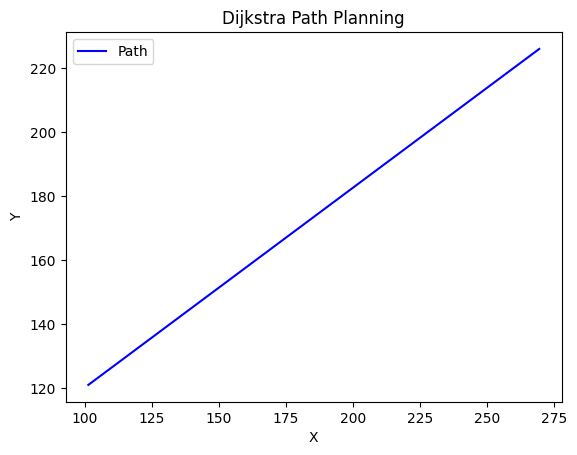

Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 4 corners stored


4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 0 5]
Detected 4 markers : [3, 4, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 

In [ ]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
if path:
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [ ]:
print(path)

[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
[(101.31373, 120.94119), (269.5, 226.0)]


Detected markers: [3 4 0 5]
Detected 4 markers : [3, 4, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 markers : [3, 4, 1, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 0 5]
Detected 5 markers : [3, 4, 1, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 0 5]
Detected 4 markers : [3, 4, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing foun

In [ ]:
path.pop(0)
goal_point = path[0]
print(goal_point)

try:
    while True:
        motion_control.obstacle_avoidance()
        if motion_control.path_tracking(thymio, goal_point):
            print(motion_control.distance_to_goal)
            path.pop(0)
            goal_point = path[0]
            if not path:
                motion_control.set_motor_speed(0, 0)
                break
        thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        time.sleep(1)
except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program finishes")

(269.5, 226.0)
Detected markers: [3 4 1 0 5]
Detected 5 markers : [3, 4, 1, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 0 5]
Detected 5 markers : [3, 4, 1, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 0 5]
Detected 5 markers : [3, 4, 1, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
No crossing found before index 125.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 4 1 0 5]
Detected 5 markers : [3, 4, 1, 0, 5]
4 detected corners, 4 corners stored
4 detected corners, 4 c

IndexError: list index out of range

In [8]:
motion_control.set_motor_speed(0, 0)
#test